In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#verilerin okunması
veriler = pd.read_csv("train.csv")

In [3]:
veriler["tarih"] = pd.to_datetime(veriler["tarih"])
veriler["Yıl"] = veriler["tarih"].dt.year
veriler["Ay"] = veriler["tarih"].dt.month
veriler["Gün"] = veriler["tarih"].dt.day

In [4]:
print(veriler)

            tarih        ürün  ürün besin değeri    ürün kategorisi  \
0      2016-01-01       kıyma                120                 et   
1      2016-01-01       tavuk                103                 et   
2      2016-01-01       hindi                160                 et   
3      2016-01-01  Bakla-kuru                354  sebze ve bakliyat   
4      2016-01-01  Bakla-taze                 72  sebze ve bakliyat   
...           ...         ...                ...                ...   
227515 2020-12-01      fındık                110          kuruyemiş   
227516 2020-12-01      fıstık                115          kuruyemiş   
227517 2020-12-01        kaju                100          kuruyemiş   
227518 2020-12-01       badem                110          kuruyemiş   
227519 2020-12-01       ceviz                120          kuruyemiş   

        ürün fiyatı ürün üretim yeri market şehir   Yıl  Ay  Gün  
0             33.41         Yurt içi      M     A  2016   1    1  
1            

In [5]:
# Encoding : Kategorik -> Nümeric
from sklearn import preprocessing 

encode_veriler = veriler.apply(preprocessing.LabelEncoder().fit_transform)
print(encode_veriler)


#veriler onehot için çekilmesi
market = encode_veriler.iloc[:,6:7].values
print(market)

sehir = encode_veriler.iloc[:,-4:-3].values
print(sehir)

kategori = encode_veriler.iloc[:,3:4].values
print(kategori)

tarih = encode_veriler.iloc[:,-2:-1]
print(tarih)

#OneHotEncoding işlemi
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
market = ohe.fit_transform(market).toarray()
print(market)


sehir = ohe.fit_transform(sehir).toarray()
print(sehir)

kategori = ohe.fit_transform(kategori).toarray()
print(kategori)

tarih = ohe.fit_transform(tarih).toarray()

        tarih  ürün  ürün besin değeri  ürün kategorisi  ürün fiyatı  \
0           0    65                 35                0         3268   
1           0    70                 32                0         1049   
2           0    61                 38                0         1039   
3           0     1                 49                3          629   
4           0     2                 23                3         1241   
...       ...   ...                ...              ...          ...   
227515     59    59                 33                1         5045   
227516     59    60                 34                1         5426   
227517     59    62                 31                1         5726   
227518     59    55                 33                1         5109   
227519     59    58                 35                1         5611   

        ürün üretim yeri  market  şehir  Yıl  Ay  Gün  
0                      1       2      0    0   0    0  
1                      

In [6]:
#DataFrame'e çevirme işlemi

sonuc = pd.DataFrame(data=market,index=range(227520),columns=['B_market','C_market','A_market'])


sonuc2 = pd.DataFrame(data=sehir,index=range(227520),columns=['A','B','C','D','E','F','G','H'])


sonuc3 = pd.DataFrame(data=kategori,index=range(227520),columns=['et','sebze ve bakliyat','tahıl ve ürünleri','süt ürünleri ve kahvaltılık','meyve','kuruyemiş'])

sonuc4 = pd.DataFrame(data=tarih,index=range(227520),columns=['Ay_1','Ay_2','Ay_3','Ay_4','Ay_5','Ay_6','Ay_7','Ay_8','Ay_9','Ay_10','Ay_11','Ay_12'])


s = pd.concat([veriler.iloc[:,2:3],sonuc3],axis=1)
print(s)

s2 = pd.concat([s,encode_veriler.iloc[:,5:6]],axis=1)
print(s2)

s3 = pd.concat([s2,sonuc],axis=1)


s4 = pd.concat([s3,sonuc2],axis=1)

s5 = pd.concat([s4,veriler.iloc[:,-3:-2]],axis=1)
print(s5)

s6 = pd.concat([s5,sonuc4],axis=1)

s7 = pd.concat([s6,veriler.iloc[:,[-1,4]]],axis=1)
print(s7)


        ürün besin değeri   et  sebze ve bakliyat  tahıl ve ürünleri  \
0                     120  1.0                0.0                0.0   
1                     103  1.0                0.0                0.0   
2                     160  1.0                0.0                0.0   
3                     354  0.0                0.0                0.0   
4                      72  0.0                0.0                0.0   
...                   ...  ...                ...                ...   
227515                110  0.0                1.0                0.0   
227516                115  0.0                1.0                0.0   
227517                100  0.0                1.0                0.0   
227518                110  0.0                1.0                0.0   
227519                120  0.0                1.0                0.0   

        süt ürünleri ve kahvaltılık  meyve  kuruyemiş  
0                               0.0    0.0        0.0  
1                      

In [7]:
ürünFiyat = s7.iloc[:,-1:]
s7 = s7.drop(["ürün fiyatı"],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# train/test split 
x_train, x_test, y_train, y_test = train_test_split(s7,ürünFiyat,test_size = 0.33,random_state = 0)

In [10]:
x_train

,ürün besin değeri,et,sebze ve bakliyat,tahıl ve ürünleri,süt ürünleri ve kahvaltılık,meyve,kuruyemiş,ürün üretim yeri,B_market,C_market,...,Ay_4,Ay_5,Ay_6,Ay_7,Ay_8,Ay_9,Ay_10,Ay_11,Ay_12,Gün
134272,120,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
158666,390,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
137403,16,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
174286,333,0.0,0.0,0.0,1.0,0.0,0.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
154367,103,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,354,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
117952,42,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
173685,402,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
43567,353,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [11]:
x_train.shape

(152438, 33)

In [12]:
x_test.shape

(75082, 33)

In [13]:
y_train.shape

(152438, 1)

In [14]:
y_test.shape

(75082, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(x_train)

MinMaxScaler()

In [18]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train

array([[0.28426396, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.96954315, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02030457, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87563452, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0177665 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential # model oluşturmak için
from tensorflow.keras.layers import Dense  # katman oluşturmak için

In [22]:
# modeli oluşturma
model = Sequential()

model.add(Dense(50,activation="relu")) # 4 nöronlu katman eklendi
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))

model.add(Dense(1)) # output katmanı 

model.compile(optimizer="adam",loss="mse")

In [23]:
model.fit(x_train,y_train,epochs=50,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/50
1525/1525 [==============================] - 3s 2ms/step - loss: 84.8763 - val_loss: 67.1825
Epoch 2/50
1525/1525 [==============================] - 2s 2ms/step - loss: 65.5306 - val_loss: 61.3369
Epoch 3/50
1525/1525 [==============================] - 2s 2ms/step - loss: 56.0611 - val_loss: 51.3166
Epoch 4/50
1525/1525 [==============================] - 2s 2ms/step - loss: 48.2303 - val_loss: 44.2147
Epoch 5/50
1525/1525 [==============================] - 2s 2ms/step - loss: 42.1774 - val_loss: 41.3710
Epoch 6/50
1525/1525 [==============================] - 2s 2ms/step - loss: 42.1280 - val_loss: 40.4901
Epoch 7/50
1525/1525 [==============================] - 2s 2ms/step - loss: 39.1462 - val_loss: 40.0680
Epoch 8/50
1525/1525 [==============================] - 2s 2ms/step - loss: 38.5025 - val_loss: 38.0480
Epoch 9/50
1525/1525 [==============================] - 2s 2ms/step - loss: 37.3206 - val_loss: 36.2482
Epoch 10/50
1525/1525 [==============================] - 2s 2ms/

In [24]:
loss=model.history.history #dictionary sözlük döndürür.

<AxesSubplot:>

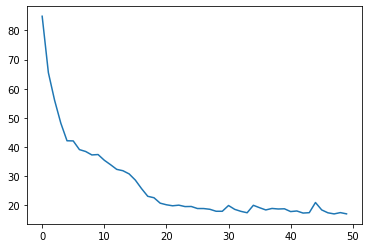

In [25]:
sns.lineplot(x=range(len(loss["loss"])),y=loss["loss"]) # sözlüğe göre görselleştirme

In [26]:
train_loss=model.evaluate(x_train,y_train,verbose=0)

In [27]:
test_loss = model.evaluate(x_test,y_test,verbose=0)

In [28]:
train_loss

17.55704116821289

In [29]:
test_loss

18.07976722717285

In [30]:
testTahminleri = model.predict(x_test)

In [31]:
testTahminleri.shape

(75082, 1)

In [32]:
tahminDF = pd.DataFrame(y_test.values,columns=["Gerçek Y"])

In [33]:
tahminDF

,Gerçek Y
0,14.76
1,6.19
2,38.22
3,9.84
4,7.64
...,...
75077,8.95
75078,8.86
75079,9.00
75080,8.00


In [34]:
testTahminleri = pd.DataFrame(data=testTahminleri,columns=["Tahmin Y"])

In [35]:
tahminDF = pd.concat([tahminDF,testTahminleri],axis=1)

In [36]:
tahminDF

,Gerçek Y,Tahmin Y
0,14.76,14.490001
1,6.19,5.987638
2,38.22,35.906406
3,9.84,10.966827
4,7.64,15.111568
...,...,...
75077,8.95,9.944305
75078,8.86,11.238443
75079,9.00,9.934772
75080,8.00,8.730817


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

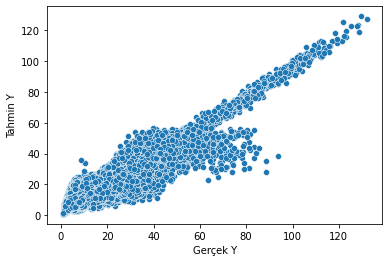

In [37]:
sns.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahminDF)